# Business Understanding

## Project Overview
Climate change is intensifying health risks across Africa, affecting diseases like malaria, cholera, and respiratory infections. Understanding how climatic and environmental conditions influence disease outbreaks is crucial for guiding public health interventions.

## Problem Statement
Public health agencies in Africa need a data-driven way to predict when and where disease risks will rise due to changing climate conditions (temperature, humidity, air quality, rainfall). Early prediction enables timely response, resource allocation, and prevention planning.

## Business Question
Can we predict disease risk levels using climate and environmental indicators?

## Objective
To build a machine learning model that predicts the Vector-Borne Disease Risk Score (or another health metric like `respiratory_disease_rate`) based on climate and environmental data.

## Specific Goals
- Explore relationships between climate variables and disease indicators.  
- Identify the most influential climatic factors driving disease outbreaks.  
- Build and evaluate ML models that predict disease risk with high accuracy.  
- Provide actionable insights for climate-health policy and planning.


# Data Understanding

## Dataset Description
- **Source:** Africa Climate Change dataset (provided)  
- **Scope:** Multiple African countries over time  

## Main Feature Categories
| Feature Category       | Features                                                                 |
|------------------------|--------------------------------------------------------------------------|
| **Climate**            | `avg_temp`, `rainfall_mm`, `humidity`, `air_quality_index`               |
| **Health**             | `vector_disease_risk_score`, `respiratory_disease_rate`, `waterborne_disease_incidents`, `heat_related_admissions` |
| **Socio-economic**     | `gdp_per_capita_usd`, `healthcare_access_index`, `food_security_index`  |
| **Geographic/Temporal**| `country_name`, `region`, `year`, `month`, `latitude`, `longitude`      |

## Target Variable
- **vector_disease_risk_score**  
  - Continuous variable → regression problem


## 1: LOAD DATA SET

In [7]:
#Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Step 2: Load dataset ---
file_path = "../data/africa_climate_change.xlsx"
climate_data = pd.read_excel(file_path)

#Step 3: Basic inspection ---
climate_data.shape
climate_data.head()
climate_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   record_id                     2256 non-null   int64         
 1   country_code                  2256 non-null   object        
 2   country_name                  2256 non-null   object        
 3   region                        2256 non-null   object        
 4   income_level                  2256 non-null   object        
 5   date                          2256 non-null   datetime64[ns]
 6   year                          2256 non-null   int64         
 7   month                         2256 non-null   int64         
 8   week                          2256 non-null   int64         
 9   latitude                      2256 non-null   float64       
 10  longitude                     2256 non-null   float64       
 11  population_millions           

## 2: Check data quality

### Checking Missing Values

Identify how many missing values are present in each column of the dataset:




In [9]:
# Missing values
climate_data.isnull().sum()



record_id                       0
country_code                    0
country_name                    0
region                          0
income_level                    0
date                            0
year                            0
month                           0
week                            0
latitude                        0
longitude                       0
population_millions             0
temperature_celsius             0
temp_anomaly_celsius            0
precipitation_mm                0
heat_wave_days                  0
drought_indicator               0
flood_indicator                 0
extreme_weather_events          0
pm25_ugm3                       0
air_quality_index               0
respiratory_disease_rate        0
cardio_mortality_rate           0
vector_disease_risk_score       0
waterborne_disease_incidents    0
heat_related_admissions         0
healthcare_access_index         0
gdp_per_capita_usd              0
mental_health_index             0
food_security_

### Unique Countries and Regions

The code below helps us understand the diversity of the dataset:




In [10]:
# Unique countries and regions
climate_data['country_name'].nunique(), climate_data['region'].unique()

(4, array(['Africa'], dtype=object))

## 3 Data Cleaning & Preparation

This phase focuses on transforming the raw dataset into a clean, structured, and analysis-ready format. Proper data cleaning ensures the accuracy and reliability of all insights and models that follow.

### **Goals for This Phase**
- **Handle missing values** to ensure consistency and avoid biased results.  
- **Drop irrelevant or redundant columns** that add no analytical value.  
- **Convert date and time-based features** into meaningful formats for analysis.  
- **Encode categorical variables** so they can be used effectively in machine learning models.

By completing these steps, we establish a strong, clean foundation for exploratory analysis and modeling in the next phases.


In [ ]:

# Handle missing values by filling with median values for numeric columns
climate_data = climate_data.fillna(climate_data.median(numeric_only=True))

In [12]:
# Drop ID-like columns
climate_data= climate_data.drop(columns=['record_id', 'country_code'], errors='ignore')


In [13]:
# Convert date to datetime
climate_data['date'] = pd.to_datetime(climate_data['date'], errors='coerce')


##  Exploratory Data Analysis (EDA)

In this phase, we dive deeper into the data to uncover meaningful patterns, trends, and relationships. EDA helps us understand how climate factors interact with various health risks across different regions and time periods.

### **Objectives of This Phase**
- **Explore distributions** of key climate and health variables.  
- **Visualize trends and correlations** to identify potential risk indicators.  
- **Detect anomalies or outliers** that may affect analysis.  
- **Generate insights** that guide feature engineering and model development.

This step sets the foundation for data-driven decision-making and strengthens the interpretation of future modeling results.


Text(0.5, 1.0, 'Distribution of Vector Disease Risk')

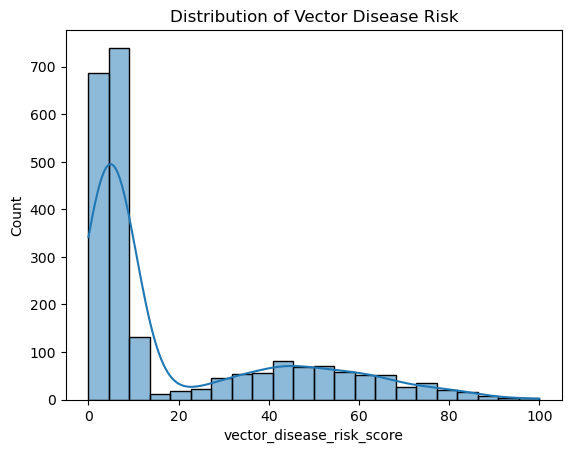

In [14]:
# Distribution of disease risk
sns.histplot(climate_data['vector_disease_risk_score'], kde=True)
plt.title("Distribution of Vector Disease Risk")